<a href="https://colab.research.google.com/github/Hashhhhhhhh/ML-with-Python/blob/main/Classical_SVM_on_iris_data_Experimenting_with_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [20]:
iris = load_iris()
X = iris.data[:100, :2]  # Take only 2 features for visualization
y = iris.target[:100]    # Classes 0 and 1 (Setosa and Versicolor)

In [23]:
#Normalize and split
scalar=RobustScaler()
X_scaled= scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
#Training SVM with different kernels
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

svm_polynomial = SVC(kernel='poly', degree=3)
svm_polynomial.fit(X_train, y_train)

svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

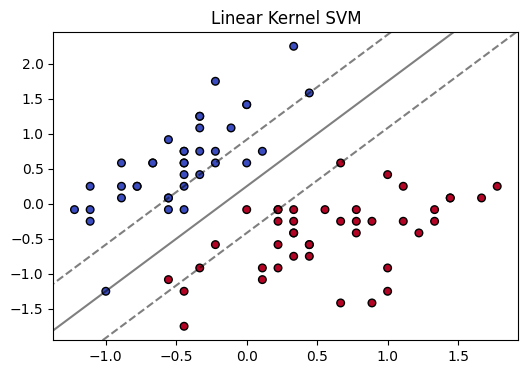

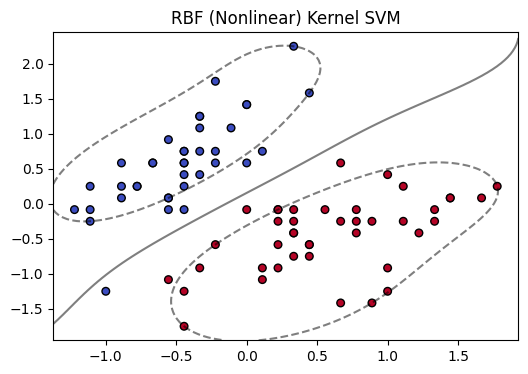

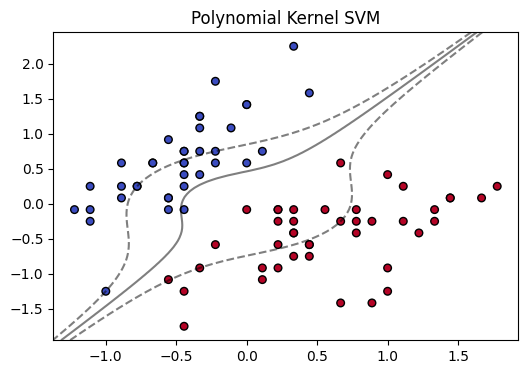

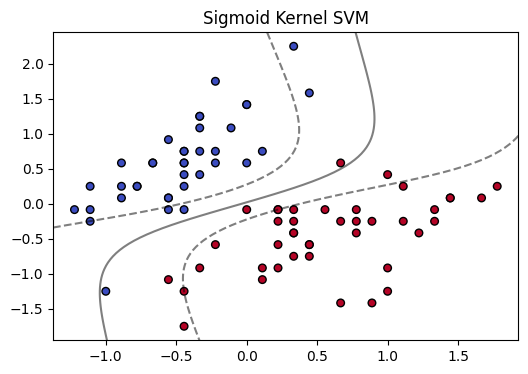

In [32]:
def plot_svm(model, X, y, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')

    # create grid
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot boundary
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1],
                alpha=0.5, linestyles=['--', '-', '--'])
    plt.title(title)
    plt.show()

plot_svm(svm_linear, X_train, y_train, "Linear Kernel SVM")
plot_svm(svm_rbf, X_train, y_train, "RBF (Nonlinear) Kernel SVM")
plot_svm(svm_polynomial, X_train, y_train, "Polynomial Kernel SVM")
plot_svm(svm_sigmoid, X_train, y_train, "Sigmoid Kernel SVM")

In [35]:
# Evaluate the models
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_polynomial = svm_polynomial.predict(X_test)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_polynomial = accuracy_score(y_test, y_pred_polynomial)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

print(f"Accuracy (Linear Kernel): {accuracy_linear:.4f}")
print(f"Accuracy (RBF Kernel): {accuracy_rbf:.4f}")
print(f"Accuracy (Polynomial Kernel): {accuracy_polynomial:.4f}")
print(f"Accuracy (Sigmoid Kernel): {accuracy_sigmoid:.4f}")
print("\nClassification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))
print("\nClassification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))
print("\nClassification Report (Polynomial Kernel):")
print(classification_report(y_test, y_pred_polynomial))
print("\nClassification Report (Sigmoid Kernel):")
print(classification_report(y_test, y_pred_sigmoid))

Accuracy (Linear Kernel): 1.0000
Accuracy (RBF Kernel): 1.0000
Accuracy (Polynomial Kernel): 1.0000
Accuracy (Sigmoid Kernel): 1.0000

Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00   